closed, manifold: True True
--- area, volume: 21850.543717435277 267677.1666666668
0 area, volume: 20281.961631644535 269487.8483395569 sphericity: 0.9844373171803285
1 area, volume: 20326.824769952906 271310.5321560846 sphericity: 0.9912067283013541
2 area, volume: 20405.973916745093 273143.9717701076 sphericity: 0.9930036013711414
3 area, volume: 20491.68967132029 274989.50797599426 sphericity: 0.9938904142654224
4 area, volume: 20580.110303119884 276847.43382995576 sphericity: 0.9944374586432707
5 area, volume: 20670.073356393797 278717.8838328933 sphericity: 0.994816965373001
6 area, volume: 20761.103249829743 280600.94889656146 sphericity: 0.995099597519716
7 area, volume: 20852.965808479697 282496.7227420473 sphericity: 0.9953203858012971
8 area, volume: 20945.53138211118 284405.29046840366 sphericity: 0.9954988396894797
9 area, volume: 21038.721959895793 286326.74502185336 sphericity: 0.9956468743814632


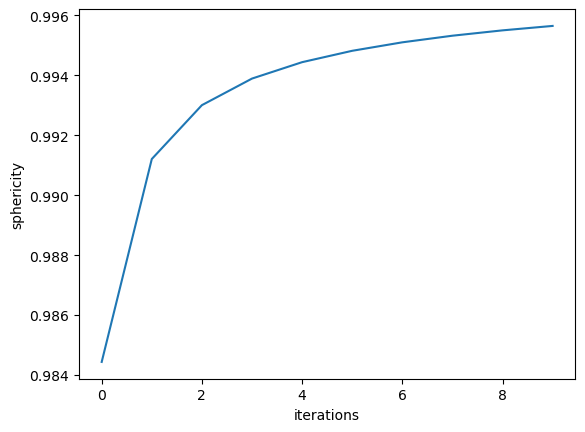

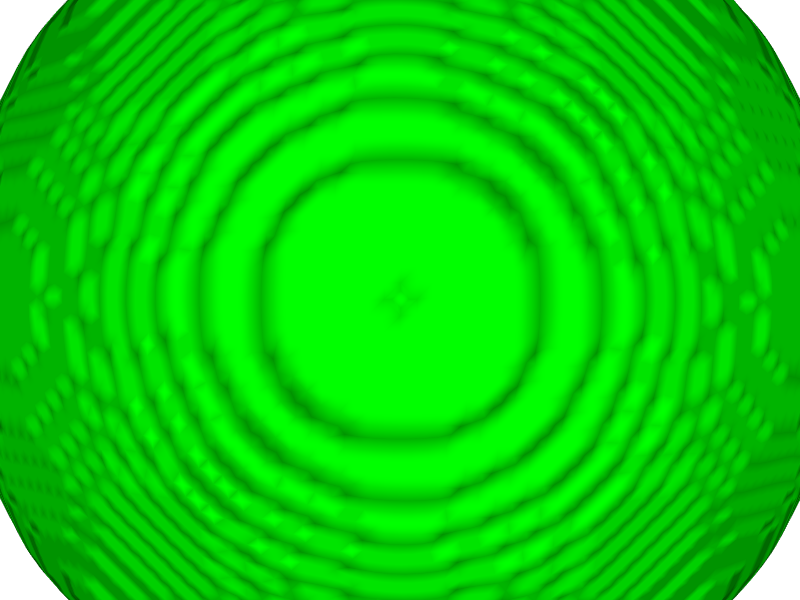

In [1]:
import vedo
import numpy as np
from vedo import *
from vedo.pyplot import plot

# draw a sphere into a 3D binary image
sphere_image = np.zeros((100, 100, 100), dtype=np.uint8)
center = np.array(sphere_image.shape) // 2
Z, Y, X = np.ogrid[:100, :100, :100]
sphere = (X - center[2])**2 + (Y - center[1])**2 + (Z - center[0])**2 <= 40**2
sphere_image[sphere] = 1

volume = vedo.Volume(sphere_image)
m0 = volume.isosurface(value=0.5)
# m0 = Sphere() # test with a sphere
m1 = m0.clone().quantize(0.0025) # make it coarse and blocky
m0.wireframe().c("black")

print("closed, manifold:", m0.is_closed(), m0.is_manifold())
print("--- area, volume:", m0.area(), m0.volume())

vs = []
for i in range(10):
    m1.smooth()
    area = m1.area()
    volume = m1.volume()
    spher = 36*3.1415*volume**2/area**3
    print(i, "area, volume:", area, volume, "sphericity:", spher)
    vs.append([i, spher])
    

pl = plot(vs, xtitle="iteration", ytitle="sphericity").clone2d()


import matplotlib.pyplot as plt
data = np.asarray(vs)
plt.plot(data[:,0], data[:,1])
plt.xlabel("iterations")
plt.ylabel("sphericity")
plt.show()

show(m0, m1, pl)
